<a href="https://colab.research.google.com/github/kennyrobert88/MachineLearning/blob/main/Logistic_Regression_for_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting with Modules to Import, we will be using tensorflow, and MNIST datasets.

In [15]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
%matplotlib inline
import torchvision.transforms as transforms
from torch.utils.data import random_split
import torch.nn as nn
import torch.nn.functional as F

Import datasets and manage datasets.

In [16]:
# Download training dataset and transform to tensors
dataset = MNIST(
    root='data/',
    download=True,
    train=True,
    transform=transforms.ToTensor()
    )

We can try to look at the example of data using matplotlib

Spliting the dataset into 3 parts.
- Training Set: used to train model
- Validation Set: used to evaluate model while training
- Test Set: using to compare different model

Image Label: 5


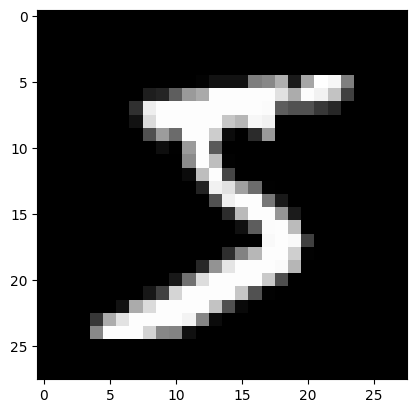

In [17]:
# Load one of the data
image_tensor, image_label = dataset[0]
print("Image Label:", image_label)
plt.imshow(image_tensor[0], cmap='gray')

Image Label: 0


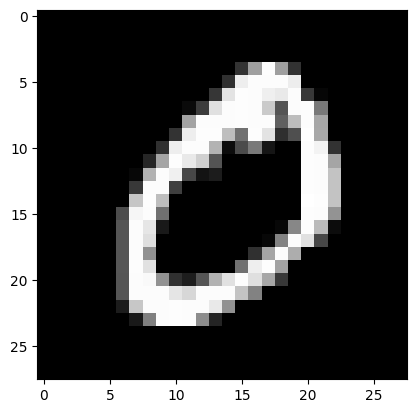

In [18]:
# Load one of the data
image_tensor, image_label = dataset[1]
print("Image Label:", image_label)
plt.imshow(image_tensor[0], cmap='gray')

Datasets split into 3:
- Training Set: Used to train model.
- Validation Set: Used to evaluate model while training.
- Test Set: Used to compare different model.

In [19]:
from torch.utils.data import random_split
# Random split for the data
train_ds, validation_ds = random_split(dataset, [50000, 10000])
print("Number of Training Data:", len(train_ds))
print("Number of Validation Data:", len(validation_ds))

Number of Training Data: 50000
Number of Validation Data: 10000


Training data as a batch

In [20]:
from torch.utils .data import DataLoader

batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
validation_loader = DataLoader(validation_ds, batch_size)

- Flatten out the tensors
- Each tensors has 28 * 28 dimensions to be 784

In [24]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

    # Function to evaluate the overall loss and accuracy
    def evaluate(self, model, val_loader):
      outputs = [model.validation_step(batch) for batch in val_loader]
      return model.validation_epoch_end(outputs)

    # Function to calcuate accuracy of the model
    def accuracy(self, outputs, labels):
      _, preds = torch.max(outputs, dim=1)
      return torch.tensor(torch.sum(preds == labels).item() / len(preds))

    # Function to training step of the machine learning
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    # Function to validate the machine learning model
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = self.accuracy(out, labels)      # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

# Defining input_size and num_classes
input_size = 28 * 28
num_classes = 10
model = MnistModel()

fit function to train the model

In [22]:
# fit function to train model using
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results

    for epoch in range(epochs):

        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation phase
        result = model.evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

Define fit function to train data with 10 epoch.

In [25]:
# Train data for 10 epoch
# Approx about 1 minutes
history = fit(10, 0.001, model, train_loader, validation_loader)

Epoch [0], val_loss: 1.9482, val_acc: 0.6149
Epoch [1], val_loss: 1.6789, val_acc: 0.7285
Epoch [2], val_loss: 1.4776, val_acc: 0.7602
Epoch [3], val_loss: 1.3255, val_acc: 0.7812
Epoch [4], val_loss: 1.2087, val_acc: 0.7940
Epoch [5], val_loss: 1.1169, val_acc: 0.8037
Epoch [6], val_loss: 1.0432, val_acc: 0.8132
Epoch [7], val_loss: 0.9831, val_acc: 0.8185
Epoch [8], val_loss: 0.9330, val_acc: 0.8226
Epoch [9], val_loss: 0.8907, val_acc: 0.8268


In [26]:
# Train data for 100 epoch
history = fit(100, 0.001, model, train_loader, validation_loader)

Epoch [0], val_loss: 0.8544, val_acc: 0.8301
Epoch [1], val_loss: 0.8231, val_acc: 0.8329
Epoch [2], val_loss: 0.7957, val_acc: 0.8359
Epoch [3], val_loss: 0.7714, val_acc: 0.8386
Epoch [4], val_loss: 0.7498, val_acc: 0.8408
Epoch [5], val_loss: 0.7305, val_acc: 0.8436
Epoch [6], val_loss: 0.7130, val_acc: 0.8459
Epoch [7], val_loss: 0.6972, val_acc: 0.8489
Epoch [8], val_loss: 0.6827, val_acc: 0.8509
Epoch [9], val_loss: 0.6695, val_acc: 0.8525
Epoch [10], val_loss: 0.6573, val_acc: 0.8538
Epoch [11], val_loss: 0.6461, val_acc: 0.8549
Epoch [12], val_loss: 0.6356, val_acc: 0.8559
Epoch [13], val_loss: 0.6260, val_acc: 0.8573
Epoch [14], val_loss: 0.6169, val_acc: 0.8578
Epoch [15], val_loss: 0.6085, val_acc: 0.8602
Epoch [16], val_loss: 0.6006, val_acc: 0.8619
Epoch [17], val_loss: 0.5931, val_acc: 0.8624
Epoch [18], val_loss: 0.5861, val_acc: 0.8633
Epoch [19], val_loss: 0.5795, val_acc: 0.8647
Epoch [20], val_loss: 0.5732, val_acc: 0.8655
Epoch [21], val_loss: 0.5673, val_acc: 0.866

- Using training dataset

In [29]:
# Define test dataset
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

test_loader = DataLoader(test_dataset, batch_size=256)
result = model.evaluate(model, test_loader)
result
# The accuracy of .89

{'val_loss': 0.3826894760131836, 'val_acc': 0.899707019329071}